# Introdução

Esse modelo tem como Objetivo classificar a Satisfação de Clientes por meio dos dois extremos da pesquisa:

* 1 - Clientes que classificaram a satisfação geral como 10;
* 0 - Clientes que calssificaram a satisfação geral como 0; 



In [11]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import skopt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

dados= pd.read_csv(r"C:\Users\Usuario\Matheus\Dissetação\Anatel\machine-learning-anatel-database\raw_data\Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
Data_Filter = Data_Filter[ Data_Filter["E1"] == 1]
Data_Filter = Data_Filter[ Data_Filter["E7"] == 1]
Data_Filter = Data_Filter[ Data_Filter["F3"] == 1]
Data_Filter = Data_Filter[ Data_Filter["A1_1"] == 1]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A1_1", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E1", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E7", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)





Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)


#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
indexNames = Data_Filter[(Data_Filter["J1"] < 10) & (Data_Filter["J1"] > 0)].index
Data_Filter.drop(indexNames, inplace= True)

Data_Filter.loc[Data_Filter.J1 >= 10, "J1"] = "SATISFEITO"
Data_Filter.loc[Data_Filter.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"



Data_Filter["J1"] = Data_Filter["J1"].replace("SATISFEITO",1)
Data_Filter["J1"] = Data_Filter["J1"].replace("INSATISFEITO",0)


def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Split da Base de Dados

In [12]:
Dados_Y = Data_Filter["J1"].copy()
Dados_X = Data_Filter.copy()
Dados_X.drop("J1", inplace= True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% test


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score

Accuracy: 0.9673055242390078
Precisão: 0.966542750929368
Recall: 0.9285714285714286
F1Score: 0.9471766848816029
AUC Score: 0.9568722052247588


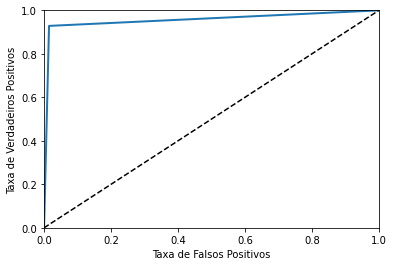

In [14]:
Rand_Forest_Class = RandomForestClassifier()

Rand_Forest_Class.fit(X_train, y_train)

y_pred = Rand_Forest_Class.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmRF = confusion_matrix(y_test, y_pred)


pRF = precision_score(y_test,y_pred)
rRF = recall_score(y_test,y_pred)
F1RF = f1_score(y_test, y_pred)
print("Precisão:", pRF)
print("Recall:", rRF)
print("F1Score:", F1RF)
fprRF, tprRF, threshold_RF = roc_curve(y_test,y_pred)
plot_roc_curve(fprRF,tprRF)
aucRF = roc_auc_score(y_test,y_pred)
print("AUC Score:",aucRF)

# Conclusão

Utilizando um modelo classificador com Random Forest através apenas dos valores extremos, nota-se um valor muito melhor em relação ao inicial, de atribuir 1 para J1>=7 e 0 caso contrário. Isso mostra que os dados intermediários podem apresentar alta variação e muita subjetividade. A ideia de separa entre os extremos veio do artigo "Predicting Patient Satisfaction: A Study of Two Emergency Departments"